# Missing Values

In [1]:
%matplotlib inline
import os
from pathlib import Path
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
import matplotlib.pylab as plt
import warnings

In [15]:
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("C:/Users/kimch/Desktop/9565_hospital_data/train.csv")

In [4]:
categorical = ["sido", "instkind", "ownerChange"]
train[categorical] = train[categorical].astype("category")

In [5]:
train.rename(columns={'Profit1':"profit1", "Debt2":"debt2"}, inplace=True)

## 결측치 확인

In [7]:
missing_percentage = pd.DataFrame(columns=['column', 'null_percentage'])

for col in train.columns:
    p = round((train[col].isnull().sum() / train[col].shape[0]), 2)
    missing_percentage =  missing_percentage.append(pd.DataFrame([[col, p]], columns=['column', 'null_percentage']), ignore_index=True)

missing_percentage.set_index("column", inplace=True)
missing_percentage = missing_percentage.sort_values(by="null_percentage", ascending=False)
missing_percentage = missing_percentage[missing_percentage["null_percentage"] > 0]
missing_percentage

,null_percentage
column,
ownerChange,0.04
employee2,0.04
inventoryAsset2,0.03
salescost2,0.03
sga2,0.03
salary2,0.03
noi2,0.03
noe2,0.03
interest2,0.03


## 결측치 맵핑  
(https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=youji4ever&logNo=221623491491)

### 1. seaborn

<AxesSubplot:>

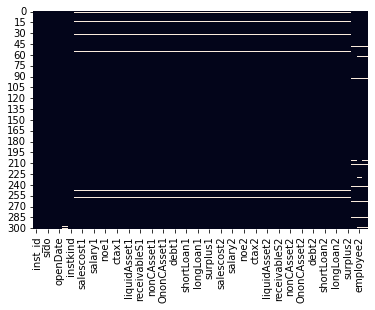

In [10]:
%matplotlib inline
sns.heatmap(train.isnull(), cbar=False)

열 몇개 빼고 다 같은 관측치에서 결측치가 있음을 확인할 수 있음 

### 2. Missingno

In [16]:
!pip install missingno

In [13]:
import missingno as msno

### 1 ) Matrix

<AxesSubplot:>

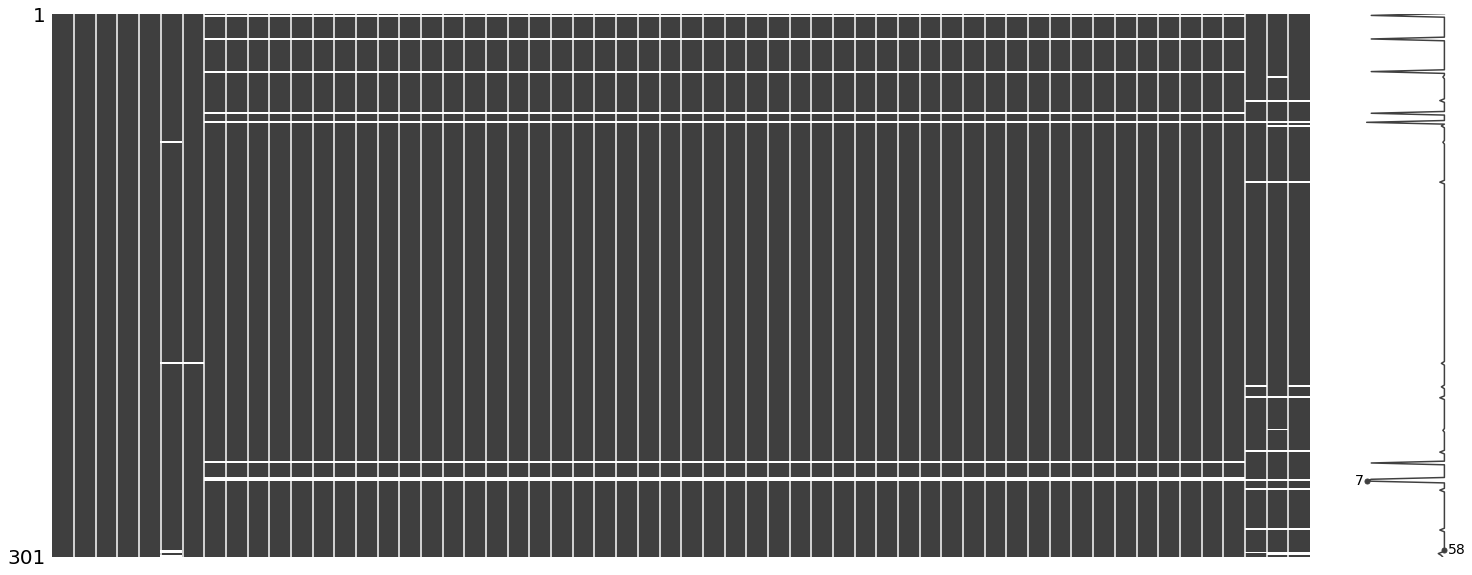

In [14]:
msno.matrix(train)

### 2 ) Bar Chart

<AxesSubplot:>

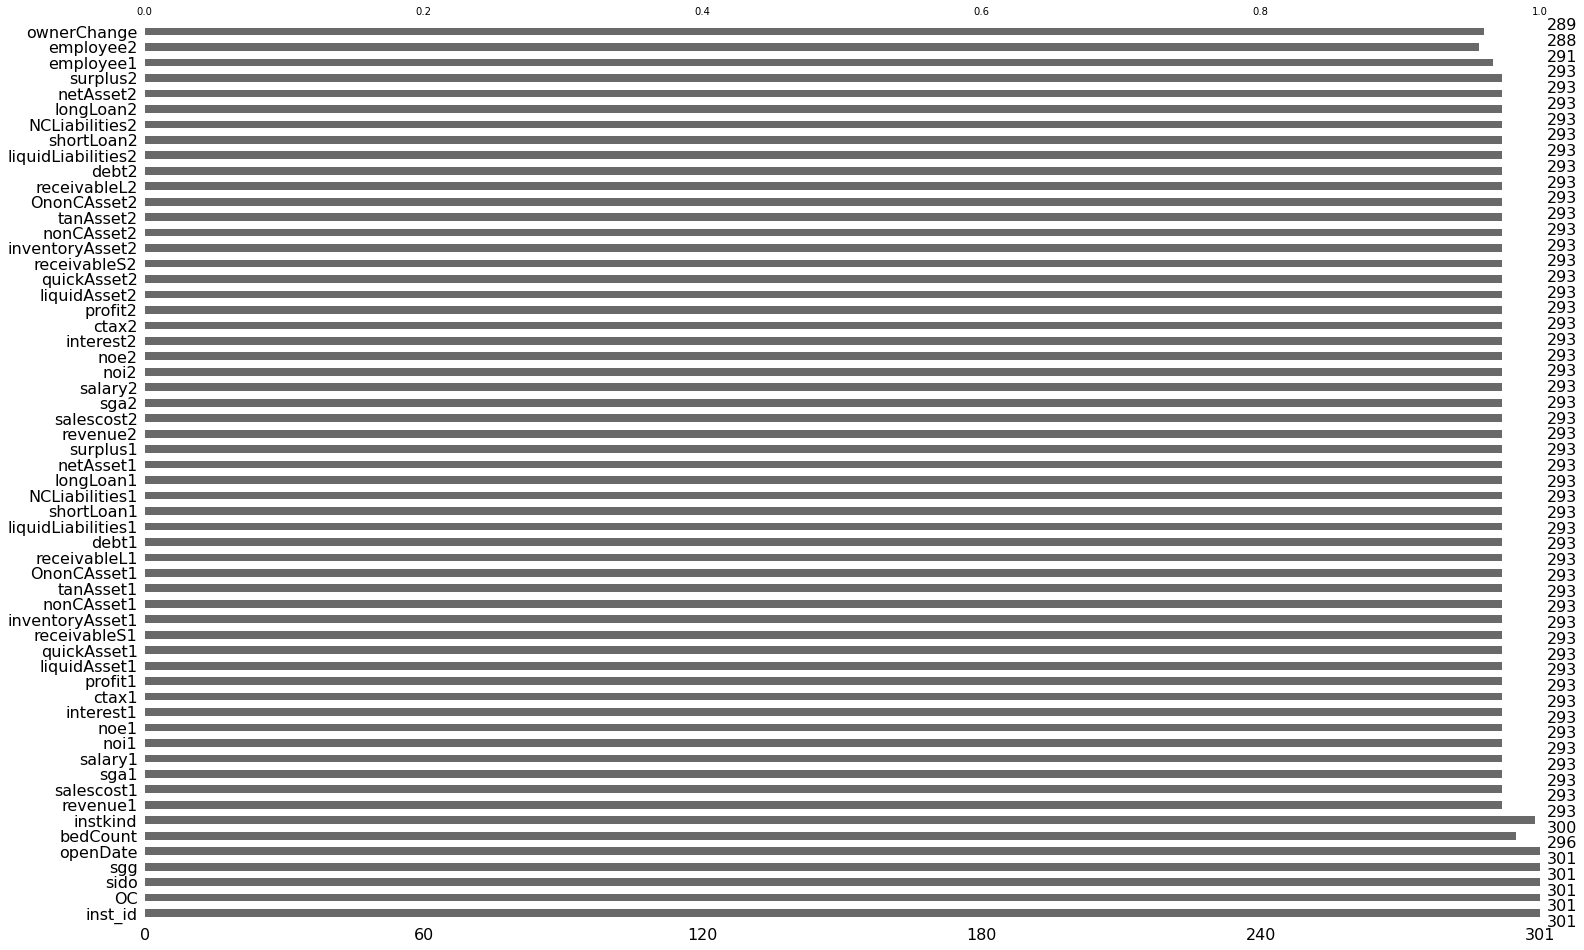

In [17]:
msno.bar(train)

### 3 ) Heatmap

<AxesSubplot:>

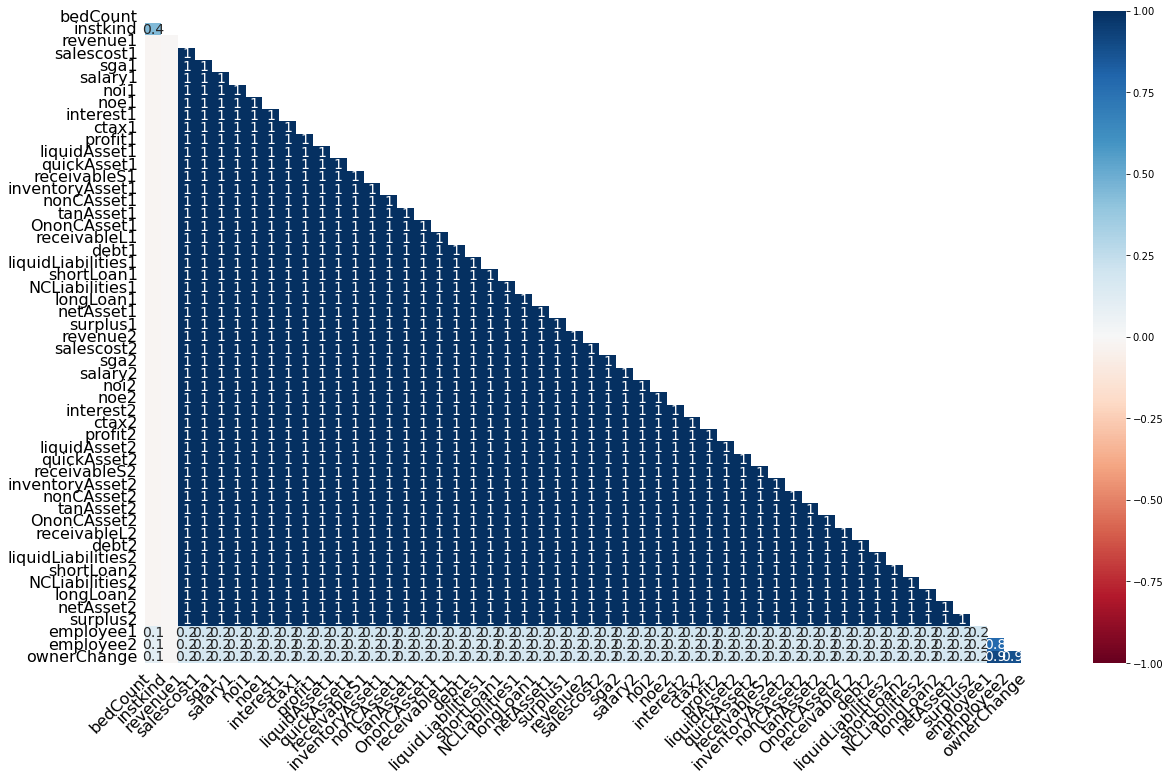

In [18]:
msno.heatmap(train)

### 3. Dendrogram

<AxesSubplot:>

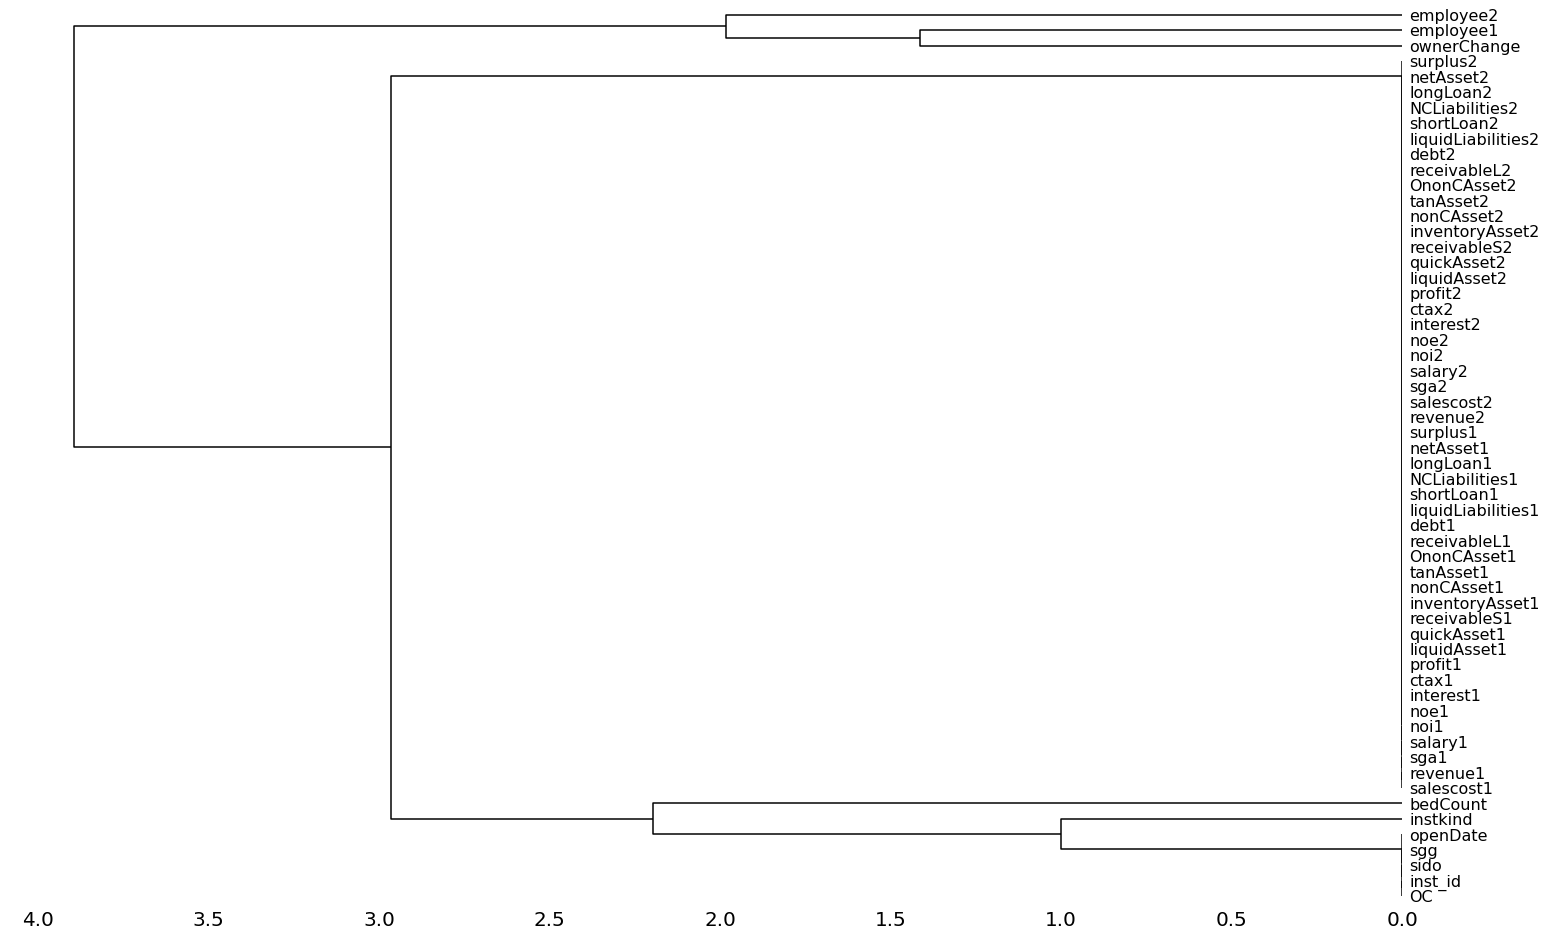

In [19]:
msno.dendrogram(train)

0에 위치한 변수들끼리는 서로를 잘 예측한다. 

## 결측치 처리

### 가이드라인
#### 가이드라인 1 (https://wooono.tistory.com/103)
-10% 미만 : 삭제(결측치 있는 행) or 대치(imputation)  
-10% ~ 50% : regression or model based imputation  
-50% 이상 : 해당 칼럼(변수) 자체 제거 
  
#### 가이드라인 2 (https://eda-ai-lab.tistory.com/14)
-10% 미만 : 삭제(결측치 있는 행) or 대치(imputation)  
-10% 이상 20% 미만 : hot deck, regression, model based method  
-20% 이상: model based method, regression

**결측치들이 다 균일하게 10% 미만으로 2% ~ 4% 형성되어 있다. -> 결측치 있는 행 삭제 혹은 대치**

## 1. 결측치 있는 행 삭제

In [11]:
train.shape

(301, 58)

In [9]:
missing_percentage_c = missing_percentage.index.tolist()

In [10]:
train_dropna = train.dropna(subset=missing_percentage_c)

In [12]:
train_dropna.shape

(277, 58)

**관측치 301 -> 277**

## 2. 대치 (Imputation)